## Introduction: - 
We need to built `Multi Linear Regression Model`to Predict the demand of shared bikes.
## Problem Statement: - 
A bike-sharing system lets people rent bikes for a short time by paying a fee or sometimes for free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
## Business Goal: - 
We need to create a model that predicts how many people will want to use shared bikes based on certain factors. This will help the management figure out how demand changes with different features and adjust their business strategy accordingly to meet customer needs. Also, it will help them understand how demand works in a new area they're entering.

## `Step 1: - Importing Required Libraries`

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## `Step 2: - Reading and Understand the Dataset`

In [165]:
# Reading the data

df = pd.read_csv('day.csv')

In [166]:
# Top 5 observations of the dataset

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [167]:
# last 5 observations of the dataset

df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [168]:
# Lets check the Shape of the dataset

df.shape

(730, 16)

In [169]:
# Lets check the datatypes of each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [170]:
# Lets check the number of null/NaN values in the dataset

df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [171]:
# Lets check the percentage null values in the datasets.

(df.isnull().sum()/(len(df)))*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [172]:
# Lets check the count of duplicate values in the dataset

duplicate_rows = len(df[df.duplicated()])
print('Count of duplicate rows in the dataset: ', round(duplicate_rows, 2))

Count of duplicate rows in the dataset:  0


In [173]:
# Let see the basic idea of dataset.

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [174]:
# We have observed from the dataset that instant is like a index column. So we can remove it.

df.drop(['instant'], axis=1, inplace=True)

In [175]:
# In the dataset we have already a separate column for year and month. Hence we will remove dtedat column.

df.drop(['dteday'], axis=1, inplace=True)

In [176]:
# From data dictionary we got to know that cnt is the sum of casual and registered column.
# And cnt is our target variable. Hence removing the casual and registered columns.

df.drop(['casual', 'registered'], axis=1, inplace=True)

In [177]:
# Lets check the data after removing some columns from the dataset.

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [178]:
# Lets check the shape of the dataset after removing some columns.

df.shape

(730, 12)

In [179]:
# Lets rename some of the columns for better understand.

df.rename(columns={'yr':'year', 'mnth':'month', 'hum':'humidity'}, inplace=True)

In [180]:
# Lets check the top 5 observations after renaming some of the columns.

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Reading and Understanding the Dataset Summary: - 
- There are `730 Rows` & `16 Columns`.
- `No` null/NaN values in the dataset.
- Count of duplicate rows in the dataset is `Zero`.
- Dropped `instant` column from dataset it looklike index column only.
- We have already have a separate columns for `year` and `month` i.e. dropped `dteday` column from dataset.
- We have removed `casual` and `registered` column from dataset beacause our target variable `cnt`. And `cnt` is addition of both column.
- Renamed some columns of the dataset for better umderstanding.

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### From the above observation, we got to know that some of the columns [season, year, month, holiday, weekday, workingday, weathersit] from dataset are Categorical Variables. 

In [182]:
# We will replace season, month, weekday and weathersit with appropariate value.

df['season'].replace({1:"Spring", 2:"Summer", 3:"Fall", 4: "Winter"}, inplace=True)

df['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 
                         7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

df['weekday'].replace({0:"Sunday", 1: "Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thrusday", 5:"Friday",
                                  6:"Saturday"}, inplace=True)

df['weathersit'].replace({1:'Clear', 2:'Cloudy', 3:'Light Rain', 4:'Heavy Rain'}, inplace=True)

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## `Step 3: - Visualising The Data`

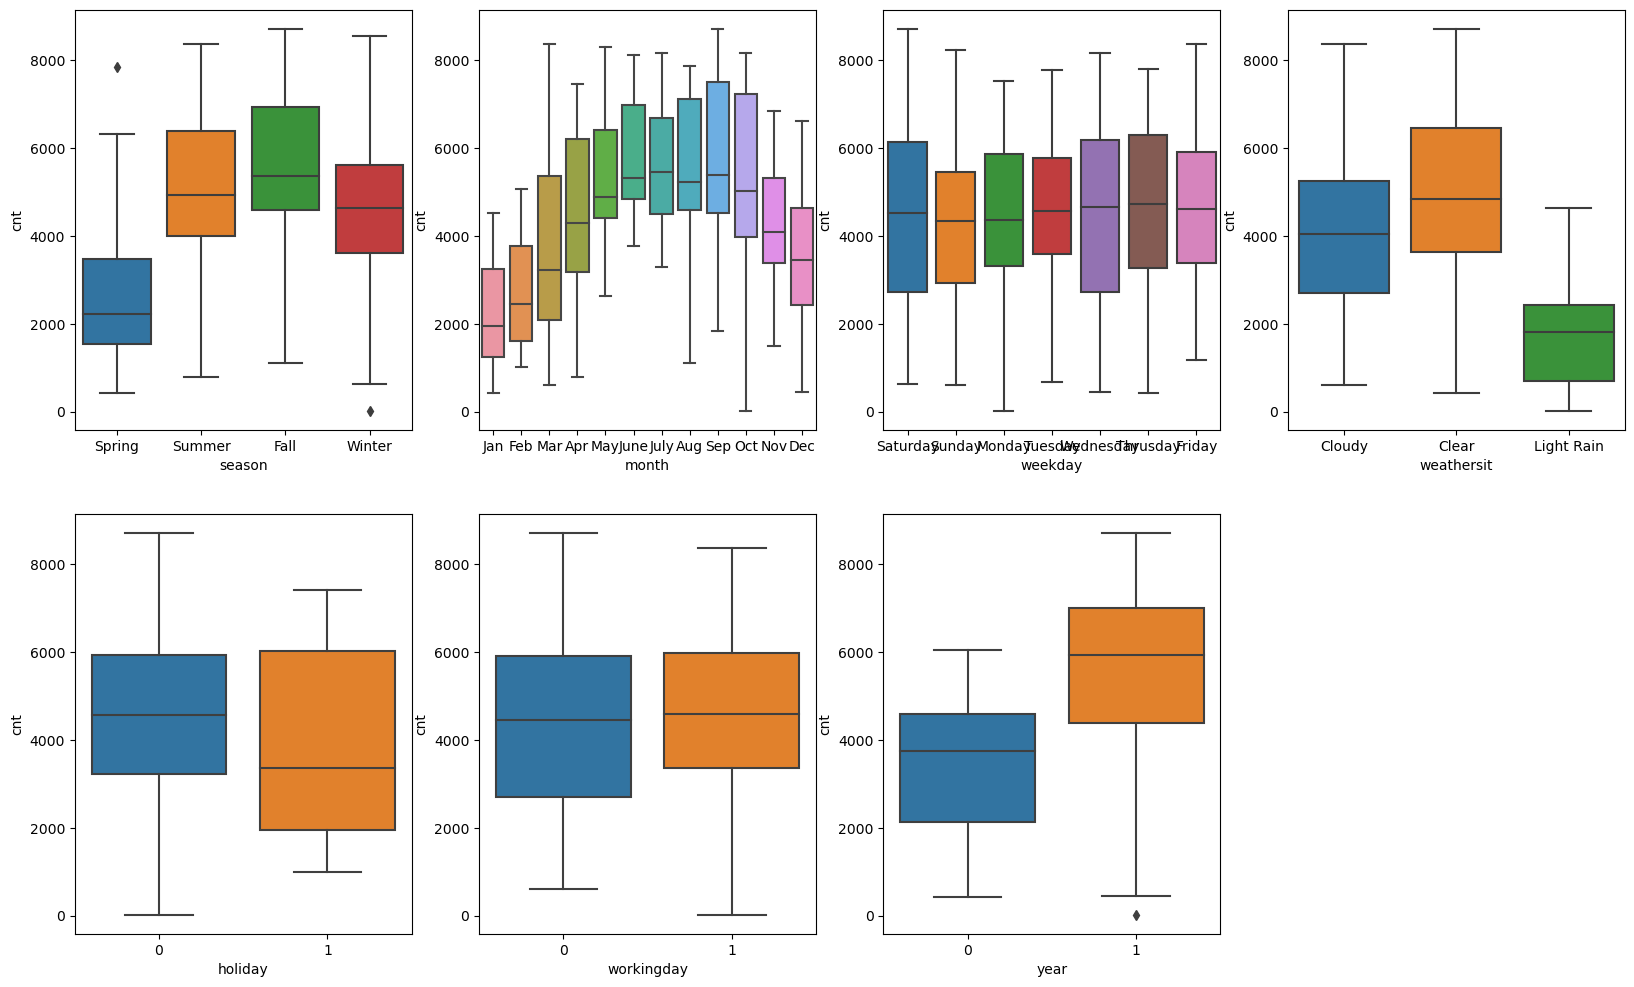

In [183]:
# Analysing and Visualizing the Categorical columns to see how predictor varibale stands against the target variable.

plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2, 4, 2)
sns.boxplot(x='month', y='cnt', data=df)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2, 4, 7)
sns.boxplot(x='year', y='cnt', data=df)
plt.show()

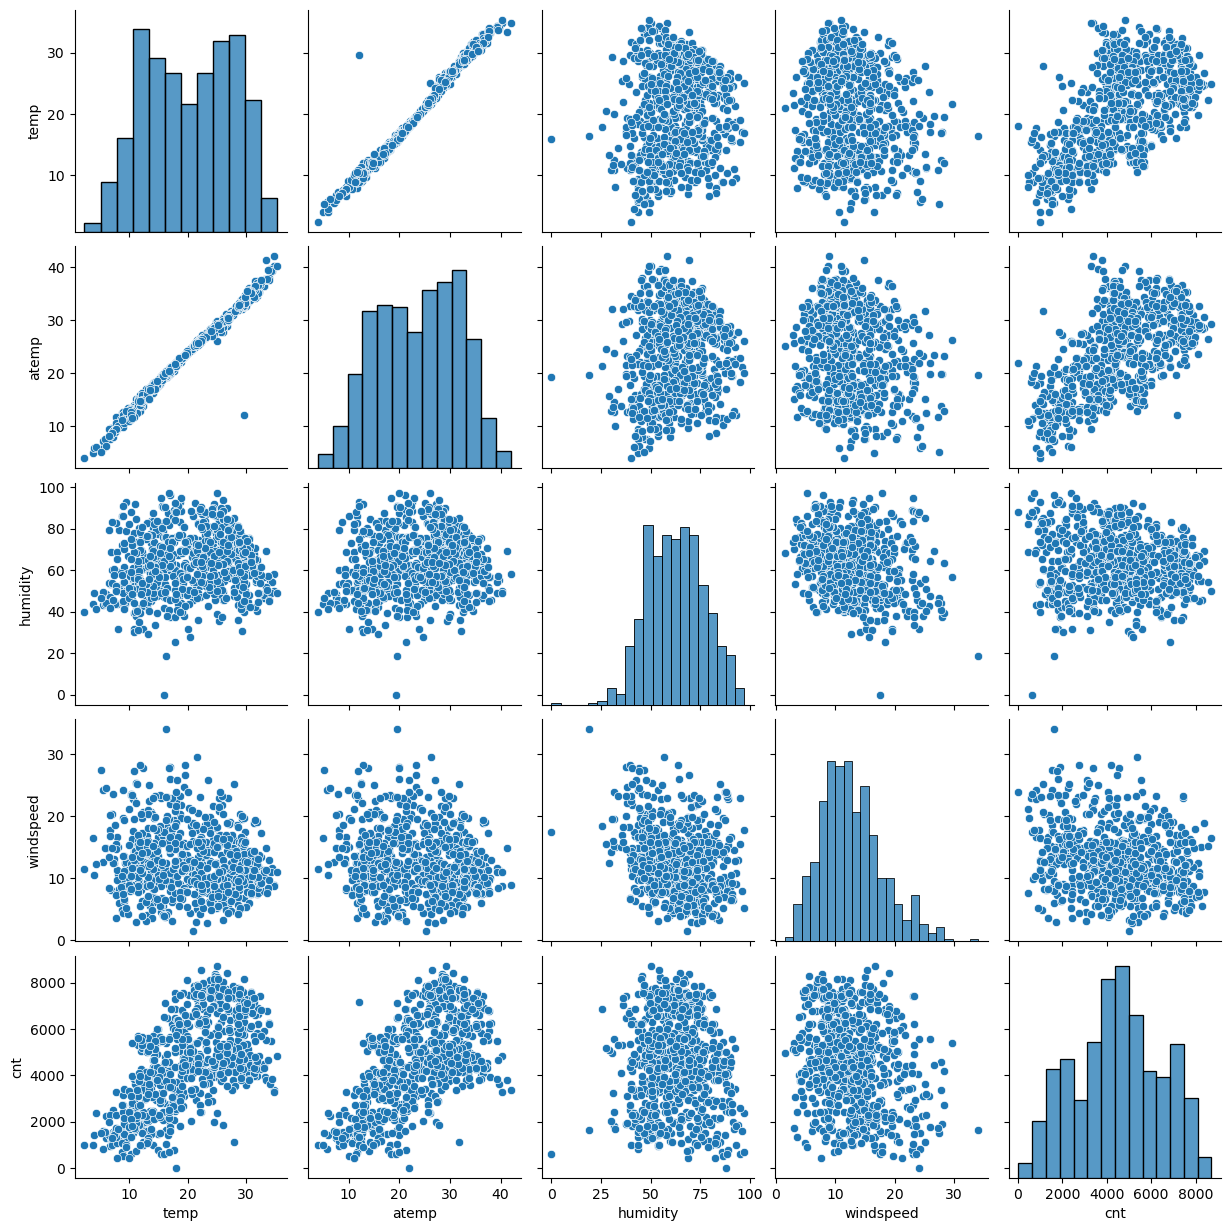

In [184]:
# Analysing and Visualizing the numerical columns

sns.pairplot(data=df, vars=['temp','atemp','humidity',
                                      'windspeed','cnt'])
plt.show()

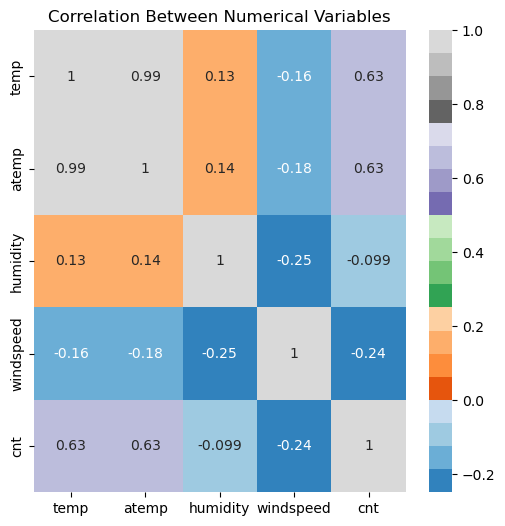

In [185]:
# Lets check the correlation between the numerical variables

plt.figure(figsize=(6, 6))
sns.heatmap(df[['temp','atemp','humidity',
            'windspeed','cnt']].corr(), annot=True, cmap='tab20c')
plt.title("Correlation Between Numerical Variables")
plt.show()

#### There is a linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. Hence we are removing atemp.

In [186]:
df.drop(['atemp'], axis=1, inplace=True)

#### Visualising The Data Summary: - 
- Bookings tend to peak during the fall season. And the number of counts has been increased in 2019 as compared 2018.
- The months of June, July, August, and September consistently see a high number of bookings. In 2019, there was a higher number of booking counts than in 2018.
- The number of bookings tends to be high when the weather is clear. And There were more bookings in 2019 compared to 2018.
- We noticed that booking numbers tend to be lower when it's not a holiday, which makes sense as people may prefer to stay home and spend time with family during holidays. But, in 2019 the number of bookings is more as compared to 2018.
- The count remains almost the same whether it's a working or non-working day. However, there has been an increase in the number of counts from 2018 to 2019.
- The overall booking numbers showed a significant increase in 2019.
- Due to the high correlation observed between "temp" and "atemp" in the heatmap, we have decided to drop the "atemp" column.

## `Step 4: - Data Preparation`

In [187]:
# Lets create a dummy variables for season, month, weekday & weathersit.

season_df = pd.get_dummies(df.season, drop_first=True)
month_df = pd.get_dummies(df.month, drop_first=True)
weekday_df = pd.get_dummies(df.weekday, drop_first=True)
weathersit_df = pd.get_dummies(df.weathersit, drop_first=True)

In [188]:
# Concatenate the dummy varibales with the dataset.

new_df = pd.concat([df, season_df, month_df, weekday_df, weathersit_df], axis=1)

In [189]:
new_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Cloudy,Light Rain
0,Spring,0,Jan,0,Saturday,0,Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,1,0
1,Spring,0,Jan,0,Sunday,0,Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,1,0
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [190]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  Spring      730 non-null    uint8  
 12  Summer      730 non-null    uint8  
 13  Winter      730 non-null    uint8  
 14  Aug         730 non-null    uint8  
 15  Dec         730 non-null    uint8  
 16  Feb         730 non-null    uint8  
 17  Jan         730 non-null    uint8  
 18  July        730 non-null    uint8  
 19  June        730 non-null    u

In [191]:
# Removing columns season, month, weekday, weathersit as we have created dummy variable.

new_df.drop(['season', 'month', 'weekday', 'weathersit'], axis=1, inplace=True)

In [192]:
# Lets check the top 5 observations of new dataset.

new_df.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Cloudy,Light Rain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [193]:
# Lets check the shaoe of new dataset.

new_df.shape

(730, 29)

## `Step 5: - Splitting the Data into Train & Test Sets`

In [194]:
# Splitting the dataset into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(new_df, train_size = 0.7, random_state = 100)

In [195]:
# Lets check the shape of the train set.

df_train.shape

(510, 29)

In [196]:
# Lets check the shape of the test set.

df_test.shape

(220, 29)

In [197]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [198]:
# Applying scaler() on columns except dummy variables and 'yes / no' columns

num_vars = ['temp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [199]:
new_df.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Cloudy,Light Rain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [200]:
df_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Cloudy,Light Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


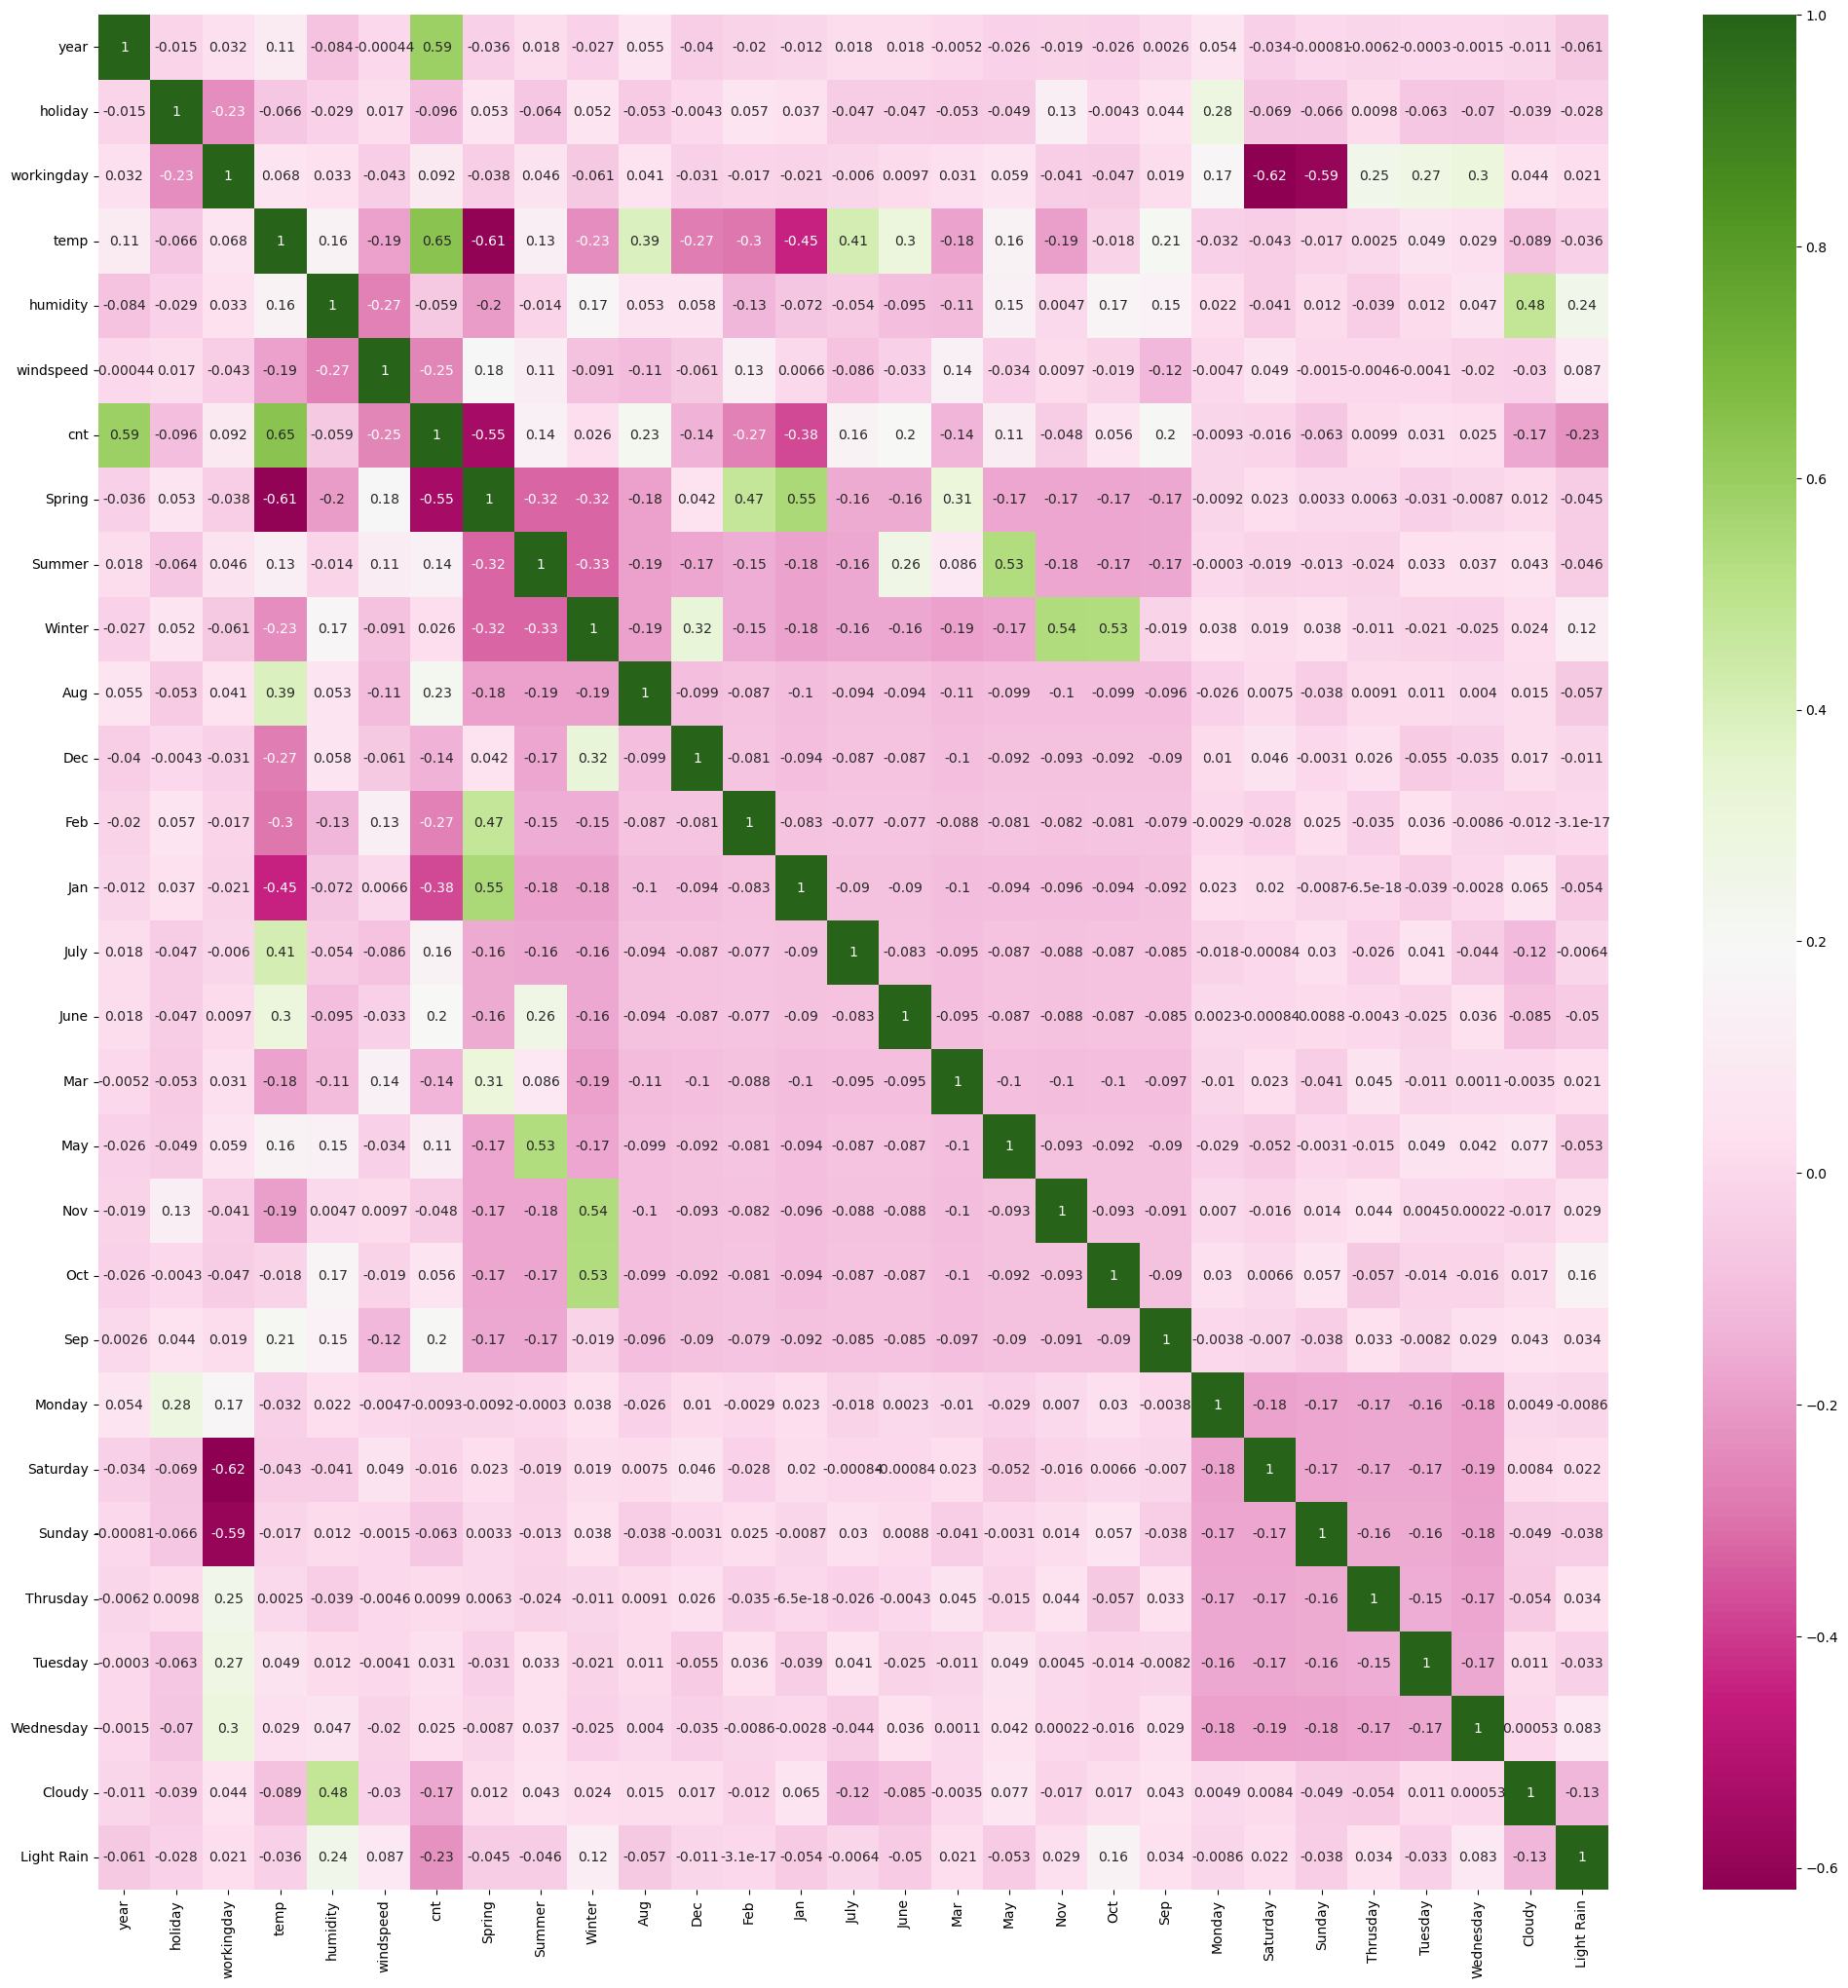

In [201]:
# Lets check the correlation coefficients to see which variables are highly correlate.

plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="PiYG")
plt.show()

#### From the above heatmap, the highly correlated between are as follows: - 
1. cnt seems to have a high Correlation between variable year, variable and temp.
2. Correlation between Cloudy and humidity.
3. Correlation between Summer season with May month.
4. Correlation between Winter season with Oct and Nov month.
5. Correlation between Spring season with Jan & Feb.

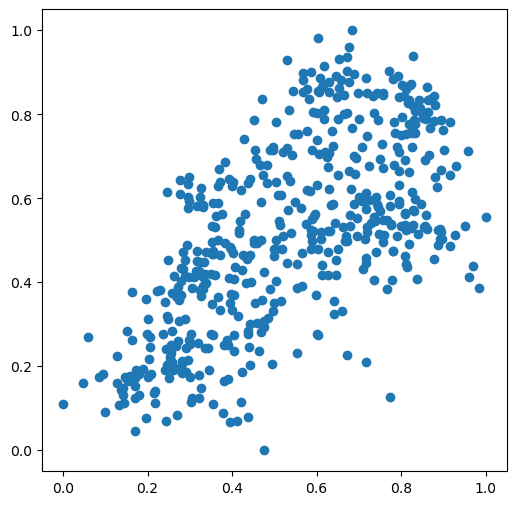

In [202]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### From the above visualization we can say that there is a positive correlation between temp and cnt.

## `Step 6: - Building a Linear Model`

In [203]:
# Dividing into X and y sets for building a linear model.

y_train = df_train.pop('cnt')
X_train = df_train

In [204]:
# Runnig Recursive Feature Elimination with the output number of the variables equal to 15.

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thrusday', False, 10),
 ('Tuesday', False, 9),
 ('Wednesday', False, 11),
 ('Cloudy', True, 1),
 ('Light Rain', True, 1)]

In [205]:
# Selecting the some variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'Spring', 'Summer', 'Winter', 'Jan', 'July', 'Sep', 'Saturday',
       'Cloudy', 'Light Rain'],
      dtype='object')


In [206]:
# Checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Monday',
       'Sunday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [207]:
# Creating generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [208]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [209]:
# Calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,Spring,4.53
8,Winter,3.46
7,Summer,2.85
13,Cloudy,2.29
0,year,2.09
12,Saturday,1.98


## `Model - 1`

In [210]:
# Building 1st linear regression model

X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          4.22e-191
Time:                        19:33:14   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.0

In [211]:
# Dropping 'humidity' variables -- it shows high VIF values

X_train_new = X_train_rfe.drop(['humidity'], axis=1)

In [212]:
# Lets calculate VIF for the new model

calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,Spring,3.07
6,Summer,2.34
0,year,2.08
7,Winter,1.98
11,Saturday,1.97
8,Jan,1.62
9,July,1.59


#### As per above VIF, the values of VIF seems to be fine now.

## `Model - 2`

In [213]:
# Building 2nd linear regression model

X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.60e-188
Time:                        19:33:14   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.520      0.0

In [214]:
# Dropping 'holiday' variables -- it shows high P - values

X_train_new = X_train_new.drop(['holiday'], axis=1)

In [215]:
# Lets calculate VIF for the new model

calculateVIF(X_train_new)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,Spring,2.99
5,Summer,2.33
0,year,2.08
6,Winter,1.91
10,Saturday,1.84
7,Jan,1.62
8,July,1.59


## `Model - 3`

In [216]:
# Building 3rd linear regression model

X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          8.68e-189
Time:                        19:33:14   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1657      0.031      5.292      0.0

In [217]:
# Dropping 'Jan' variables -- it shows high P - values

X_train_new = X_train_new.drop(['Jan'], axis=1)

In [218]:
# Lets calculate VIF for the new model

calculateVIF(X_train_new)

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
4,Spring,2.38
5,Summer,2.32
0,year,2.07
6,Winter,1.91
9,Saturday,1.83
7,July,1.58
10,Cloudy,1.57


## `Model - 4`

In [219]:
# Building 4th linear regression model

X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          7.12e-189
Time:                        19:33:14   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1492      0.031      4.881      0.0

In [220]:
# Dropping 'July' variables -- it shows high P - values

X_train_new = X_train_new.drop(['July'], axis=1)

In [221]:
# Lets calculate VIF for the new model

calculateVIF(X_train_new)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
4,Spring,2.30
0,year,2.07
5,Summer,2.00
8,Saturday,1.83
6,Winter,1.76
9,Cloudy,1.57
7,Sep,1.23


## `Model - 5`

In [222]:
# Building 5th linear regression model

X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train, X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.42e-188
Time:                        19:33:14   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1406      0.031      4.597      0.0

In [223]:
# Dropping 'Spring' variables -- it shows high P - values

X_train_new = X_train_new.drop(['Spring'], axis=1)

In [224]:
# Lets calculate VIF for the new model

calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,year,2.02
7,Saturday,1.69
4,Summer,1.57
8,Cloudy,1.53
5,Winter,1.40
6,Sep,1.20
9,Light Rain,1.08


## `Model - 6`

In [225]:
# Building 6th linear regression model

X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train, X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.13e-188
Time:                        19:33:14   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.019      4.031      0.0

#### 
1. We can consider the Model 6 as a final model. It seems to have very low multicolinearity between the predictors and p-values for all the predictors.
2. All the variables p-value < 0.05 and VIF < 5.
3. F-statistics value is 253.0 which is greater than 1.
4. Prob (F-statistic) is ~ 0
5. All coefficients are non zero. Hence the Model - 6 is significant.

In [226]:
# Lets check the parameters and their coefficient values

lr6.params

const         0.075009
year          0.233139
workingday    0.056117
temp          0.549892
windspeed    -0.155203
Summer        0.088621
Winter        0.130655
Sep           0.097365
Saturday      0.067500
Cloudy       -0.080022
Light Rain   -0.287090
dtype: float64

## `Step 7: - Residual Analysis`

In [227]:
X_train_lm6

,const,year,workingday,temp,windspeed,Summer,Winter,Sep,Saturday,Cloudy,Light Rain
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,1,1,0
111,1.0,0,1,0.345824,0.380981,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,1,0
79,1.0,0,1,0.462664,0.529881,1,0,0,0,1,0


In [228]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

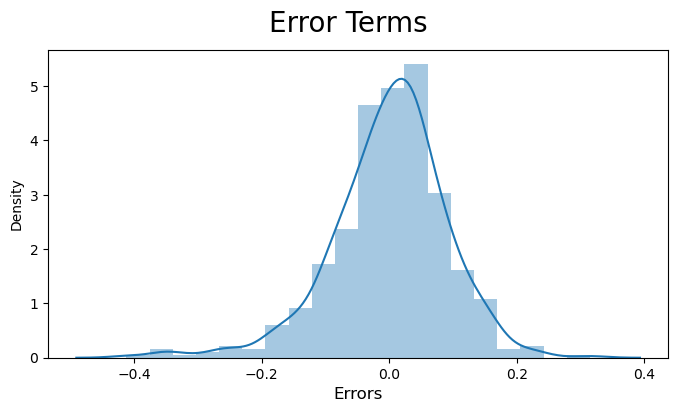

In [229]:
# Lets plot the histogram of the Error Terms

fig = plt.figure(figsize=(8, 4))
res = y_train - y_train_pred
sns.distplot(res, bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=12)

## Multi Colinearity

In [230]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,year,2.02
7,Saturday,1.69
4,Summer,1.57
8,Cloudy,1.53
5,Winter,1.40
6,Sep,1.20
9,Light Rain,1.08


#### VIF is less than 5 which is good.

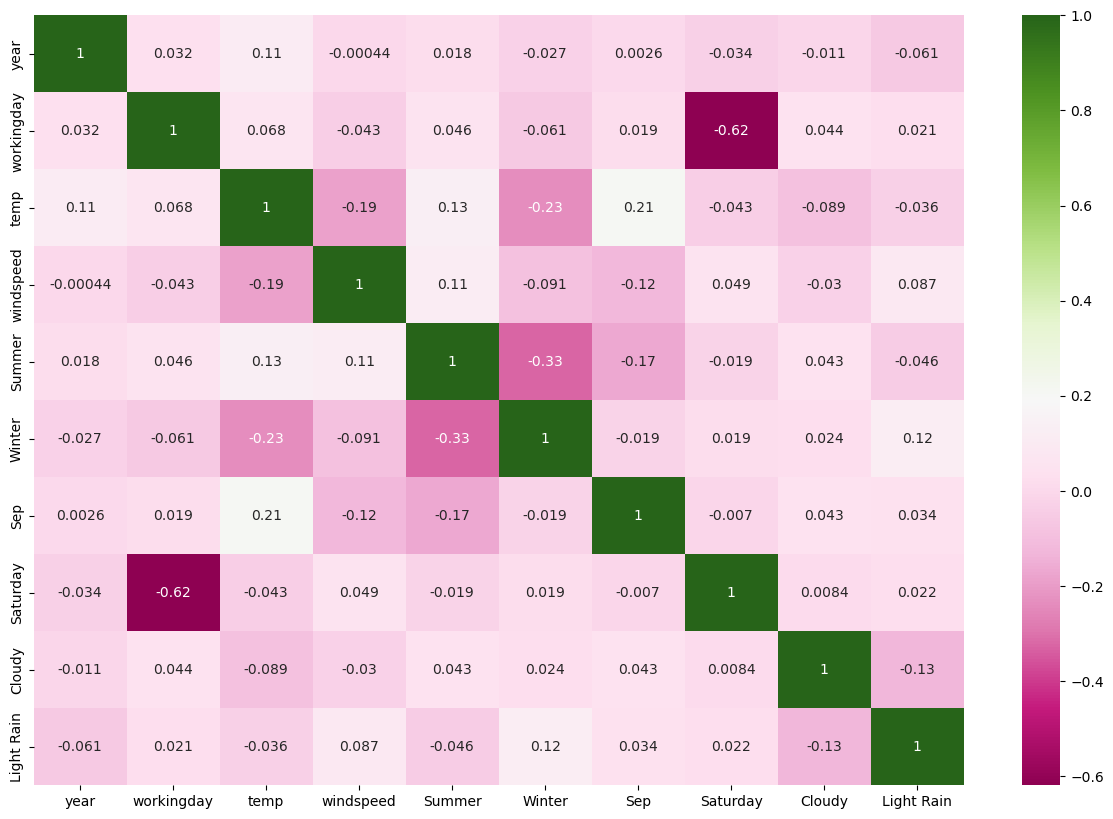

In [231]:
plt.figure(figsize=(15, 10))
sns.heatmap(X_train_new.corr(), annot=True, cmap="PiYG")
plt.show()

#### As per the above heatmap there is no multicollinearity

## Homoscedasticity

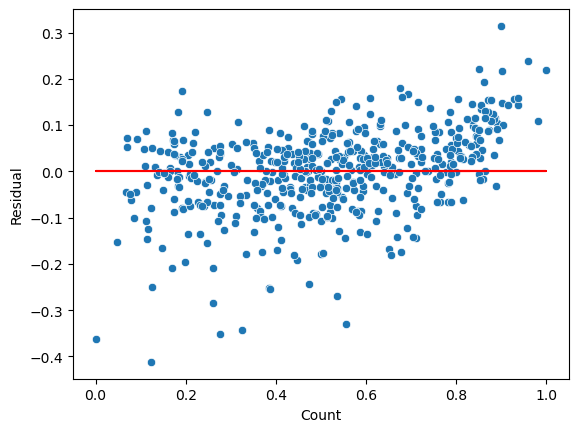

In [232]:
y_train_pred = lr6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)  # Corrected argument format
plt.plot(y_train, (y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### From the above plot for residuals we cannot seen any kind of visible pattern.

## Linearity

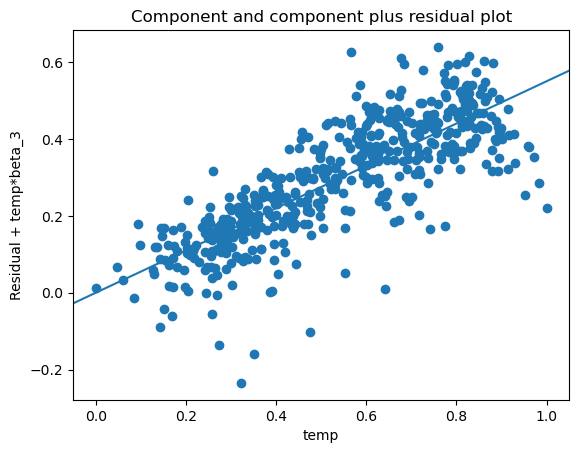

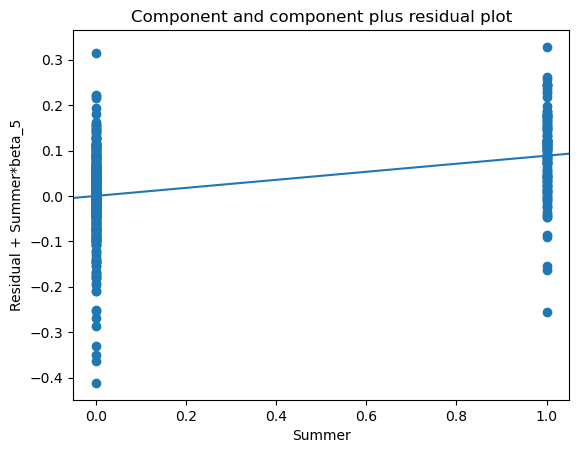

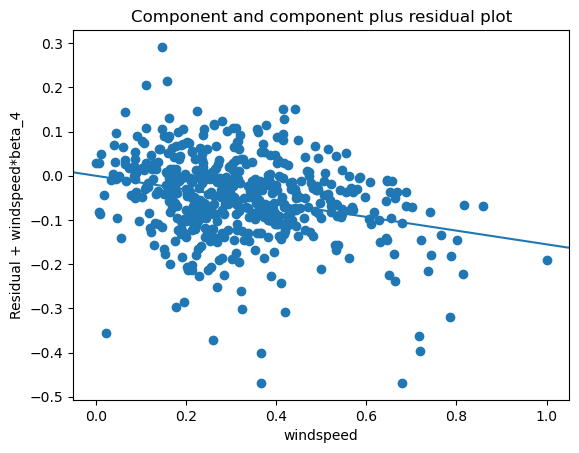

In [233]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr6, 'Summer')
plt.show()

sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

#### Linearity can be observed from above visualizations

## Independence of residuals

#### The Durbin-Watson value of 2.089 for the final model lr6 indicates that there is no significant autocorrelation present in the residuals..


## `Step 8: - Making Predictions Using the Final Model`

In [234]:
# Fit on data in test model.

num_vars = ['temp', 'humidity', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Cloudy,Light Rain
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [235]:
y_test = df_test.pop('cnt')
X_test = df_test

In [236]:
X_test_new = X_test[X_train_new.columns]

# Adding constant variable to test dataframe

X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,year,workingday,temp,windspeed,Summer,Winter,Sep,Saturday,Cloudy,Light Rain
184,1.0,0,0,0.831783,0.084219,0,0,0,0,1,0
535,1.0,1,1,0.901354,0.153728,1,0,0,0,0,0
299,1.0,0,1,0.511964,0.334206,0,1,0,0,1,0
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.537414,1,0,0,0,0,0


In [237]:
# Predict on Test Model

y_test_pred = lr6.predict(X_test_new)

## `Step 9: - Model Evaluation`

#### Lets plot the scatter plot for actual vs predicted values.

Text(0, 0.5, 'y_test_pred')

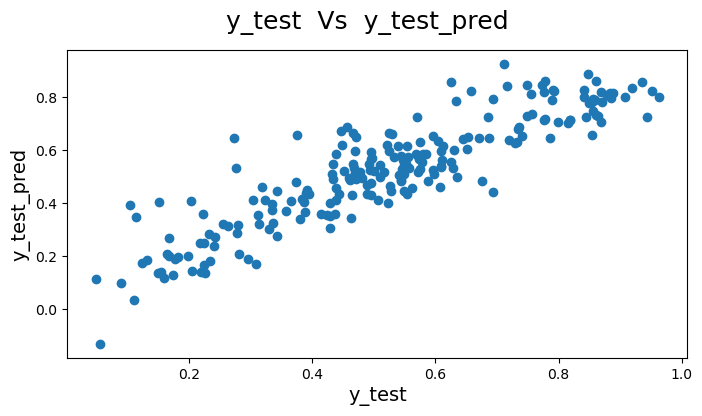

In [238]:
# Plotting y_test and y_train_pred to understand the spread.

fig = plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test  Vs  y_test_pred', fontsize=18)
plt.xlabel('y_test', fontsize=14)
plt.ylabel('y_test_pred', fontsize=14)

In [239]:
round(lr6.params, 4)

const         0.0750
year          0.2331
workingday    0.0561
temp          0.5499
windspeed    -0.1552
Summer        0.0886
Winter        0.1307
Sep           0.0974
Saturday      0.0675
Cloudy       -0.0800
Light Rain   -0.2871
dtype: float64

#### The equation of best fitter line is 
$cnt = 0.0750 + 0.2331 * year + 0.0561 * workingday + 0.5499 * temp - 0.1552 * windspeed + 0.0886 * Summer  + 0.1307 * Winter + 0.0974 * Sep + 0.0675 * Saturday - 0.0800 * Cloudy - 0.2871 * Light Rain $

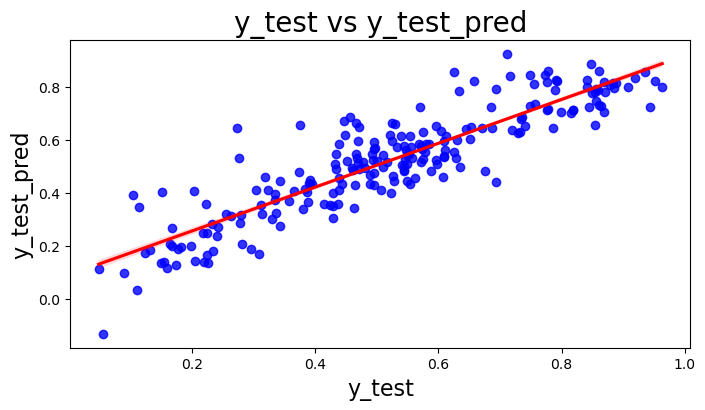

In [240]:
# Visualizing the best fit on the test data and plotting a regression plot

plt.figure(figsize=(8, 4))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

In [241]:
# Lets calculate the R^2 for the test dataset

r2 = r2_score(y_test, y_test_pred)
round(r2, 4)

0.7961

In [242]:
# Lets calculate the Adjusted - R^2 for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7663


## Comparision between Training Set and Test Set
<pre>
Train dataset R^2                : 0.835
Test dataset R^2                 : 0.7961
Train dataset Adjusted R^2       : 0.832         
Test dataset Adjusted R^2        : 0.7663  

#### Demand of bikes is increased in 2019 and it depends on year, workingday, temp, windspeed, Summer, Winter, Sep, Saturday, Cloudy, Light Rain.